In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datei mit passendem Encoding einlesen
superstore = pd.read_csv("Superstore.csv", encoding="latin1")
# Die ersten 5 Zeilen anzeigen
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [58]:
# 500 Zeilen auswählen
kurz_superstor = superstore.head(500)

# In eine neue CSV speichern
kurz_superstor.to_csv("Superstore_kurz.csv", index=False)

print(" Datei Superstore_kurz.csv wurde erstellt!")

 Datei Superstore_kurz.csv wurde erstellt!


In [59]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [60]:

superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Unnötige Spalten löschen

In [61]:
superstore.drop(columns=["Row ID", "Country", "Customer Name"], inplace=True)

Datumsspalten in datetime umwandeln

In [62]:
superstore["Order Date"] = pd.to_datetime(superstore["Order Date"], errors="coerce", dayfirst=True)
superstore["Ship Date"] = pd.to_datetime(superstore["Ship Date"], errors="coerce", dayfirst=True)

In [63]:
superstore[superstore["Order Date"].isna()]
superstore[superstore["Ship Date"].isna()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Neu spalten erstellen

In [64]:
# Berechnete Spalten
superstore["Preis_pro_Stück"] = superstore["Sales"] / superstore["Quantity"]
superstore["Profit_pro_Stück"] = superstore["Profit"] / superstore["Quantity"]
superstore["Lieferzeit"] = (superstore["Ship Date"] - superstore["Order Date"]).dt.days

# Zeitinformationen extrahieren
superstore["Order_Day"] = superstore["Order Date"].dt.day
superstore["Order_Month"] = superstore["Order Date"].dt.month
superstore["Order_Year"] = superstore["Order Date"].dt.year
superstore["Order_Quarter"] = superstore["Order Date"].dt.quarter
superstore["Product_Brand"] = superstore["Product Name"].apply(lambda x: x.split()[0])

In [65]:
superstore[["Sales","Profit","Quantity","Preis_pro_Stück","Profit_pro_Stück",
            "Lieferzeit","Order_Month","Product_Brand"]].sample(5)

,Sales,Profit,Quantity,Preis_pro_Stück,Profit_pro_Stück,Lieferzeit,Order_Month,Product_Brand
3998,373.080,82.0776,6,62.180,13.6796,4,3,Deflect-o
8193,98.352,9.8352,3,32.784,3.2784,3,11,Belkin
9146,99.980,42.9914,2,49.990,21.4957,4,1,Logitech
7203,8.736,-4.8048,3,2.912,-1.6016,4,12,Master
1282,17.430,-13.3630,1,17.430,-13.3630,2,4,Avery


In [66]:
superstore["Product_Brand"] = superstore["Product Name"].apply(lambda x: x.split()[0])

Daten überprüfen

In [67]:
superstore["Product_Brand"] = superstore["Product Name"].apply(lambda x: x.split()[0])

In [68]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          9994 non-null   object        
 1   Order Date        9994 non-null   datetime64[ns]
 2   Ship Date         9994 non-null   datetime64[ns]
 3   Ship Mode         9994 non-null   object        
 4   Customer ID       9994 non-null   object        
 5   Segment           9994 non-null   object        
 6   City              9994 non-null   object        
 7   State             9994 non-null   object        
 8   Postal Code       9994 non-null   int64         
 9   Region            9994 non-null   object        
 10  Product ID        9994 non-null   object        
 11  Category          9994 non-null   object        
 12  Sub-Category      9994 non-null   object        
 13  Product Name      9994 non-null   object        
 14  Sales             9994 n

Analyse der Kunden

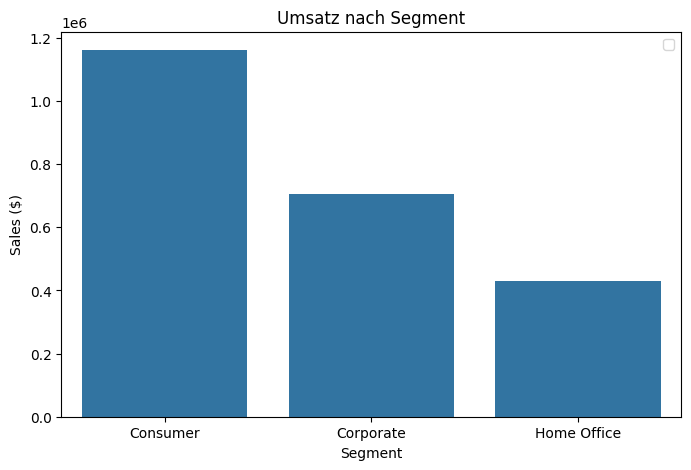

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


In [69]:
# Aggregation
segment_summary = superstore.groupby("Segment")[["Sales","Profit"]].sum().reset_index()

# Barplot Sales
sns.set_style("white")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"]="white"
plt.style.use("default")
plt.figure(figsize=(8,5))
sns.barplot(x="Segment", y="Sales", data=segment_summary, dodge=False)
plt.title("Umsatz nach Segment")
plt.ylabel("Sales ($)")
plt.xlabel("Segment")
plt.legend("")
plt.show()
segment_summary

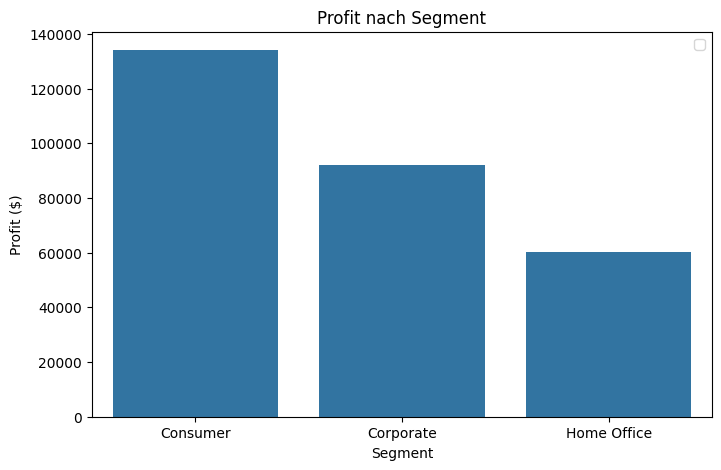

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


In [70]:
# Barplot Profit
plt.figure(figsize=(8,5),facecolor="white")
sns.barplot(x="Segment", y="Profit", data=segment_summary,)
plt.title("Profit nach Segment")
plt.ylabel("Profit ($)")
plt.xlabel("Segment")
plt.legend("")
plt.show()
segment_summary

# 🟢 Bakhtyar Abscnitt- Zeitliche Analyse (Monat, Quartal, Jahr)

In [71]:
superstore["Order Date"] = pd.to_datetime(superstore["Order Date"], errors="coerce", dayfirst=True)
superstore["Ship Date"] = pd.to_datetime(superstore["Ship Date"], errors="coerce", dayfirst=True)

In [72]:
superstore[["Order Date", "Ship Date"]].isna().sum()

Order Date    0
Ship Date     0
dtype: int64

Monatliche Aggregation

In [73]:
# Monatliche Aggregation
monthly = superstore.resample("ME", on="Order Date")[["Sales", "Profit"]].sum().reset_index()
monthly.head()

,Order Date,Sales,Profit
0,2011-01-31,13946.229,2446.7711
1,2011-02-28,4810.558,865.7280
2,2011-03-31,55691.009,498.7299
3,2011-04-30,28295.345,3488.8352
4,2011-05-31,23648.287,2738.7096


Diagramm: Lineplot für Sales & Profit

Welche Monate haben Spitzenumsätze? Gibt es einen Zusammenhang zwischen Umsatz und Gewinn?

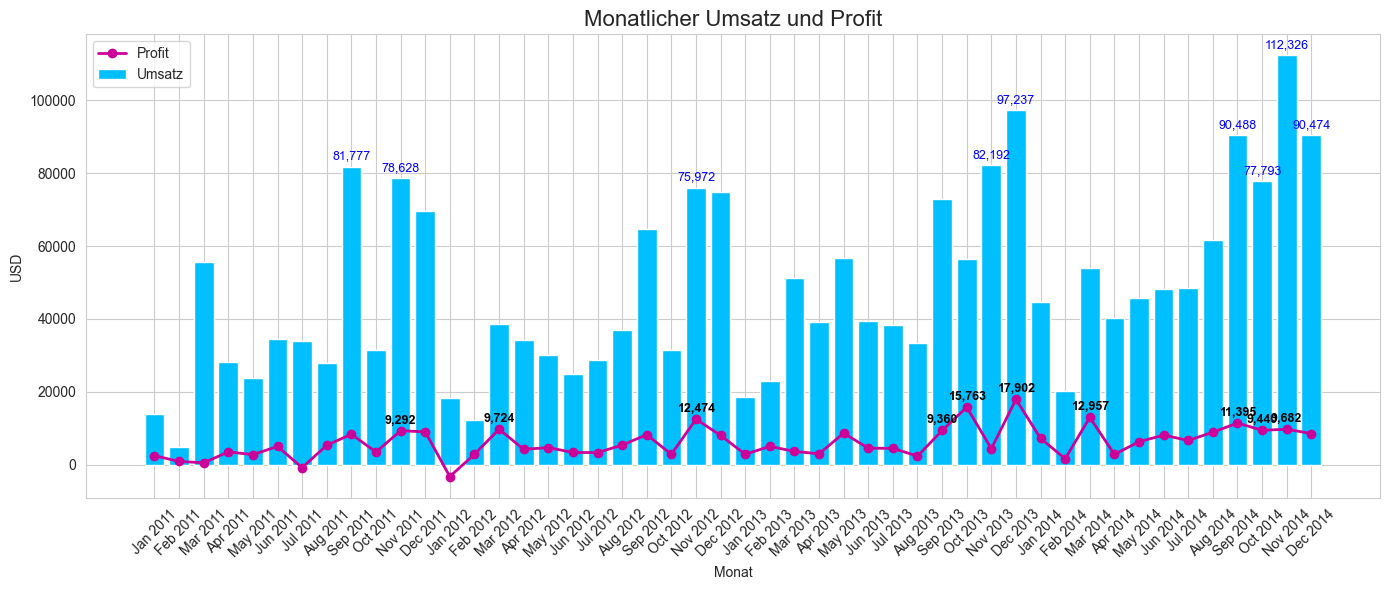

In [74]:

# Datum in beschreibende Monatsnamen umwandeln
monthly['Monat'] = monthly['Order Date'].dt.strftime('%b %Y')

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

# Säulen für Umsatz
bars = plt.bar(monthly['Monat'], monthly['Sales'], color='deepskyblue', label='Umsatz')

# Linie für Profit
plt.plot(monthly['Monat'], monthly['Profit'], color='#cc0099', marker='o', label='Profit', linewidth=2)

# Werte über den wichtigen Punkten anzeigen
for i, row in monthly.iterrows():
    if row['Sales'] > monthly['Sales'].quantile(0.8) and i!=23  :  # nur Werte über dem 70. Perzentil
        plt.text(i, row['Sales'] + 2000, f'{int(row["Sales"]):,}', ha='center', color='blue', fontsize=9)
    if row['Profit'] > monthly['Profit'].quantile(0.8):
        plt.text(i, row['Profit'] + 2000, f'{int(row["Profit"]):,}', ha='center', color='Black',fontweight="bold", fontsize=9)

plt.title("Monatlicher Umsatz und Profit", fontsize=16)
plt.ylabel("USD")
plt.xlabel("Monat")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
monthly.iterrows()
list(monthly.iterrows())

[(0,
  Order Date    2011-01-31 00:00:00
  Sales                   13946.229
  Profit                  2446.7711
  Monat                    Jan 2011
  Name: 0, dtype: object),
 (1,
  Order Date    2011-02-28 00:00:00
  Sales                    4810.558
  Profit                    865.728
  Monat                    Feb 2011
  Name: 1, dtype: object),
 (2,
  Order Date    2011-03-31 00:00:00
  Sales                   55691.009
  Profit                   498.7299
  Monat                    Mar 2011
  Name: 2, dtype: object),
 (3,
  Order Date    2011-04-30 00:00:00
  Sales                   28295.345
  Profit                  3488.8352
  Monat                    Apr 2011
  Name: 3, dtype: object),
 (4,
  Order Date    2011-05-31 00:00:00
  Sales                   23648.287
  Profit                  2738.7096
  Monat                    May 2011
  Name: 4, dtype: object),
 (5,
  Order Date    2011-06-30 00:00:00
  Sales                  34595.1276
  Profit                  4976.5244
  Monat

Umsatz und Gewinn nach Quartal vergleichen

Welche Quartale sind am profitabelsten? Profit folgt dem Umsatz?

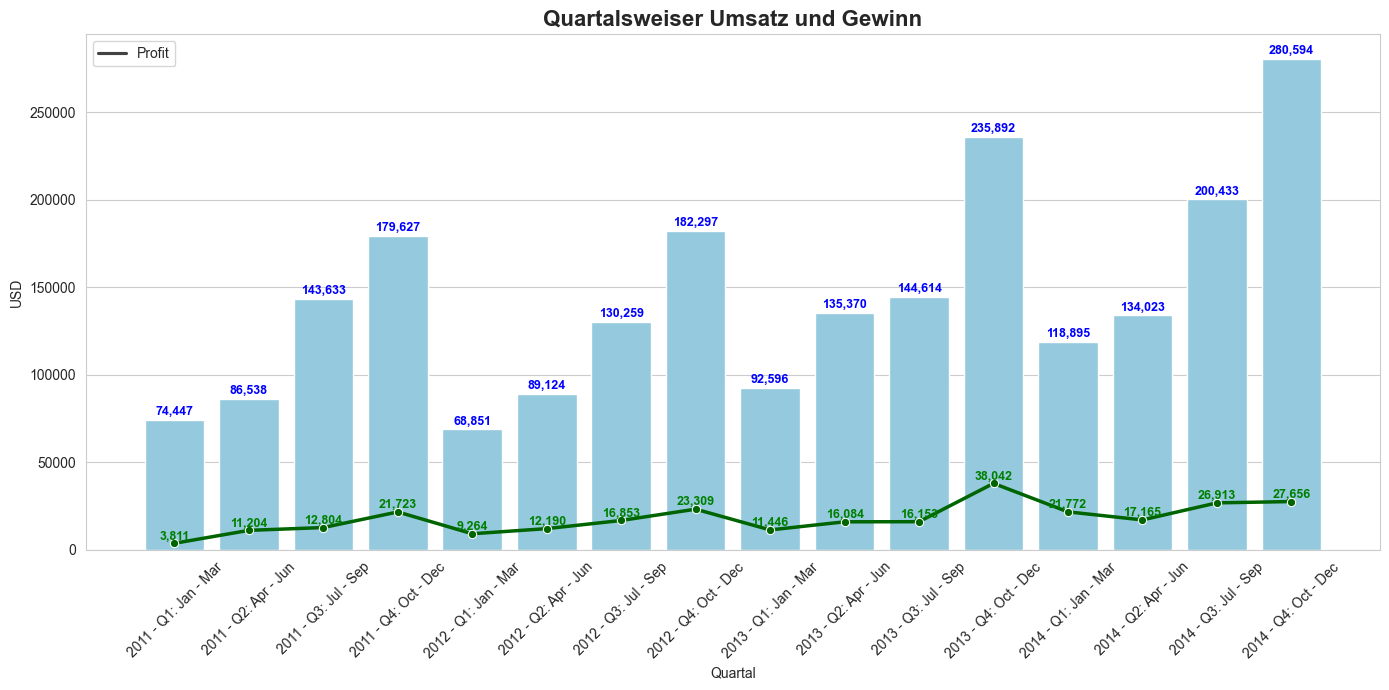

,Jahr,Quartal,Sales,Profit,Jahr_Quartal
0,2011,Q1: Jan - Mar,74447.7960,3811.2290,2011 - Q1: Jan - Mar
1,2011,Q2: Apr - Jun,86538.7596,11204.0692,2011 - Q2: Apr - Jun
2,2011,Q3: Jul - Sep,143633.2123,12804.7218,2011 - Q3: Jul - Sep
3,2011,Q4: Oct - Dec,179627.7302,21723.9541,2011 - Q4: Oct - Dec
4,2012,Q1: Jan - Mar,68851.7386,9264.9416,2012 - Q1: Jan - Mar


In [76]:
# Datum in datetime umwandeln
superstore["Order Date"] = pd.to_datetime(superstore["Order Date"], errors="coerce", dayfirst=True)
#  Spalten in numerisch umwandeln
superstore["Sales"] = pd.to_numeric(superstore["Sales"], errors="coerce")
superstore["Profit"] = pd.to_numeric(superstore["Profit"], errors="coerce")
# Quartals-Labels erstellen
def quartal_label(datum):
    if datum.month in [1,2,3]:
        return "Q1: Jan - Mar"
    elif datum.month in [4,5,6]:
        return "Q2: Apr - Jun"
    elif datum.month in [7,8,9]:
        return "Q3: Jul - Sep"
    else:
        return "Q4: Oct - Dec"

superstore["Quartal"] = superstore["Order Date"].apply(quartal_label)

# 4. Aggregation nach Jahr + Quartal
quartal_summary = superstore.groupby(
    [superstore["Order Date"].dt.year, "Quartal"]
)[["Sales","Profit"]].sum().reset_index()

quartal_summary.rename(columns={"Order Date":"Jahr"}, inplace=True)
quartal_summary["Jahr_Quartal"] = quartal_summary["Jahr"].astype(str) + " - " + quartal_summary["Quartal"]
# Diagramm
plt.figure(figsize=(14,7))

# Säulen: Umsatz
sns.barplot(
    data=quartal_summary,
    x="Jahr_Quartal",
    y="Sales",
    color="skyblue"
)
import numpy as np

# X-Positionen für Balken
x_pos = np.arange(len(quartal_summary))

# Werte auf den Säulen für Umsatz anzeigen
for i, bar in enumerate(plt.gca().patches[:len(quartal_summary)]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1000,       # etwas über der Säule
        f'{int(height):,}',  # Wert formatieren
        ha='center',
        va='bottom',
        fontsize=9,
        color='blue',
        fontweight='bold'
    )

# Werte auf der Linie für Profit anzeigen
for i, y in enumerate(quartal_summary["Profit"]):
    plt.text(
        x_pos[i], y + 500,   # etwas über dem Punkt
        f'{int(y):,}',       # Wert formatieren
        ha='center',
        va='bottom',
        fontsize=9,
        color='green',
        fontweight='bold'
    )

# Achsen X anpassen (Zahlen -> Quartal-Labels)
plt.xticks(x_pos, quartal_summary["Jahr_Quartal"], rotation=45)
# Linie: Profit auf demselben Y-Achse
sns.lineplot(
    data=quartal_summary,
    x="Jahr_Quartal",
    y="Profit",
    color="darkgreen",
    marker="o",
    linewidth=2.5,
    label="Profit"
)

# Beschriftungen
plt.ylabel("USD")
plt.xlabel("Quartal")
plt.xticks(rotation=45)
plt.title("Quartalsweiser Umsatz und Gewinn", fontsize=16, fontweight="bold")
plt.legend(["Profit"])
plt.tight_layout()
plt.show()
#Übersicht der aggregierten Werte
quartal_summary.head()

Jährlich Aggregation

In [77]:
# Jährliche Aggregation
yearly = superstore.resample("YE", on="Order Date")[["Sales","Profit"]].sum().reset_index()
yearly.head()

,Order Date,Sales,Profit
0,2011-12-31,484247.4981,49543.9741
1,2012-12-31,470532.5090,61618.6037
2,2013-12-31,608473.8300,81726.9308
3,2014-12-31,733947.0232,93507.5131


Lineplot

Welches Jahr hat die höchsten Umsätze? Gibt es Wachstumstrends?

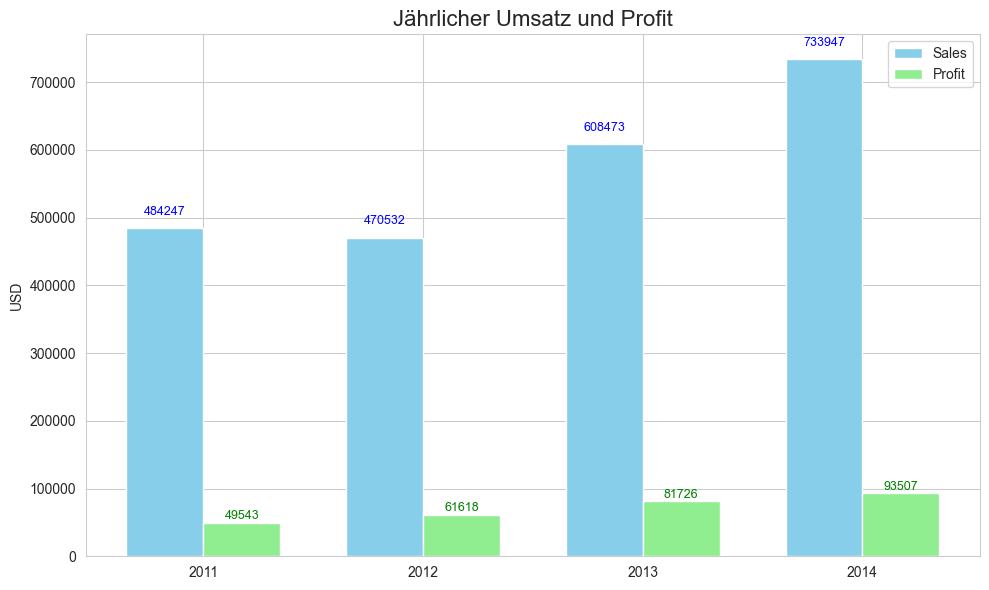

In [78]:
plt.figure(figsize=(10,6))
x = range(len(yearly))
width = 0.35

plt.bar([i - width/2 for i in x], yearly["Sales"], width=width, label="Sales", color="skyblue")
plt.bar([i + width/2 for i in x], yearly["Profit"], width=width, label="Profit", color="lightgreen")

# Werte über den Balken anzeigen
for i, row in yearly.iterrows():
    plt.text(i - width/2, row["Sales"]+20000, f'{int(row["Sales"])}', ha='center', fontsize=9, color="blue")
    plt.text(i + width/2, row["Profit"]+5000, f'{int(row["Profit"])}', ha='center', fontsize=9, color="green")

plt.xticks(x, yearly["Order Date"].dt.year)  # nur das Jahr anzeigen
plt.ylabel("USD")
plt.title("Jährlicher Umsatz und Profit", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

Für monatliche Veränderung

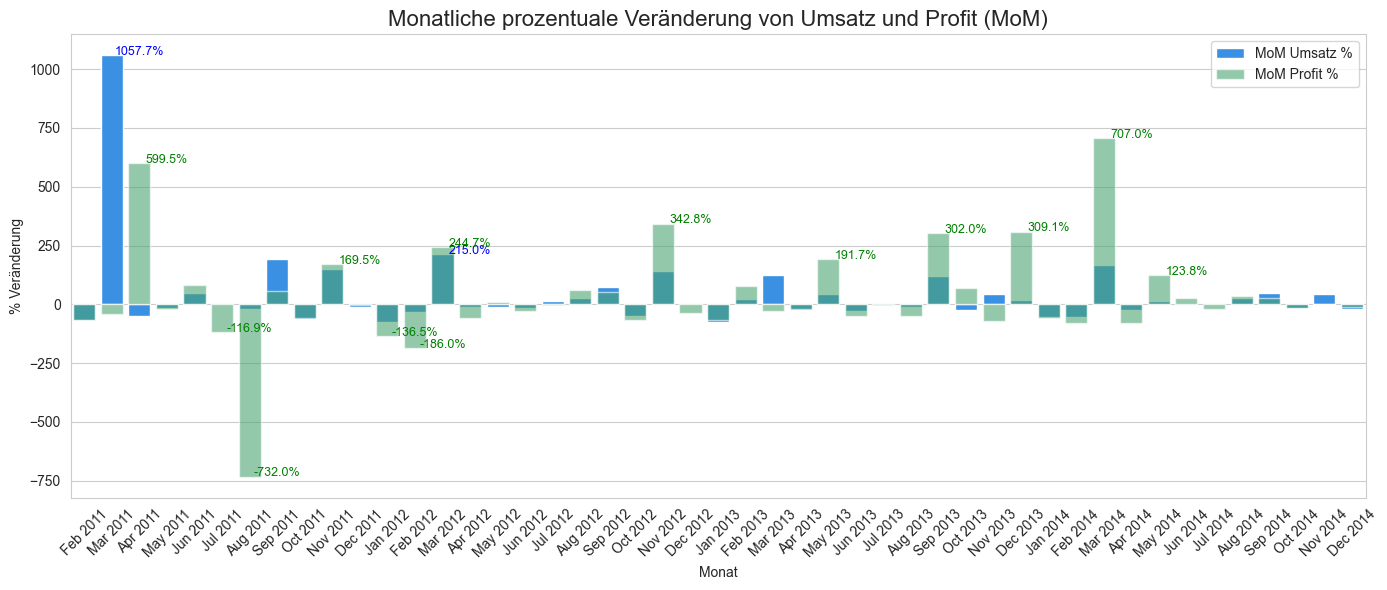

In [79]:
# 1. Monatsspalte erstellen
monthly['Monat'] = monthly['Order Date'].dt.strftime('%b %Y')

# Monatliche prozentuale Veränderung
monthly["MoM_Sales_pct"] = monthly["Sales"].pct_change() * 100
monthly["MoM_Profit_pct"] = monthly["Profit"].pct_change() * 100

# NaN entfernen
monthly_plot = monthly.dropna(subset=["MoM_Sales_pct", "MoM_Profit_pct"])

# 4. Diagramm zeichnen
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

# Balken für Umsatz und Profit
sns.barplot(x="Monat", y="MoM_Sales_pct", data=monthly_plot, color="dodgerblue", label="MoM Umsatz %")
sns.barplot(x="Monat", y="MoM_Profit_pct", data=monthly_plot, color="mediumseagreen", alpha=0.6, label="MoM Profit %")

# Werte über den Balken anzeigen
for i, row in monthly_plot.iterrows():
    if abs(row["MoM_Sales_pct"]) > 200:
        plt.text(i, row["MoM_Sales_pct"] + 1, f'{row["MoM_Sales_pct"]:.1f}%',
                 ha='center', fontsize=9, color="blue")
    if abs(row["MoM_Profit_pct"]) > 100:
        plt.text(i, row["MoM_Profit_pct"] + 1, f'{row["MoM_Profit_pct"]:.1f}%',
                 ha='center', fontsize=9, color="green")

plt.title("Monatliche prozentuale Veränderung von Umsatz und Profit (MoM)", fontsize=16)
plt.ylabel("% Veränderung")
plt.xlabel("Monat")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Jährliche prozentuale Veränderung(YOY)

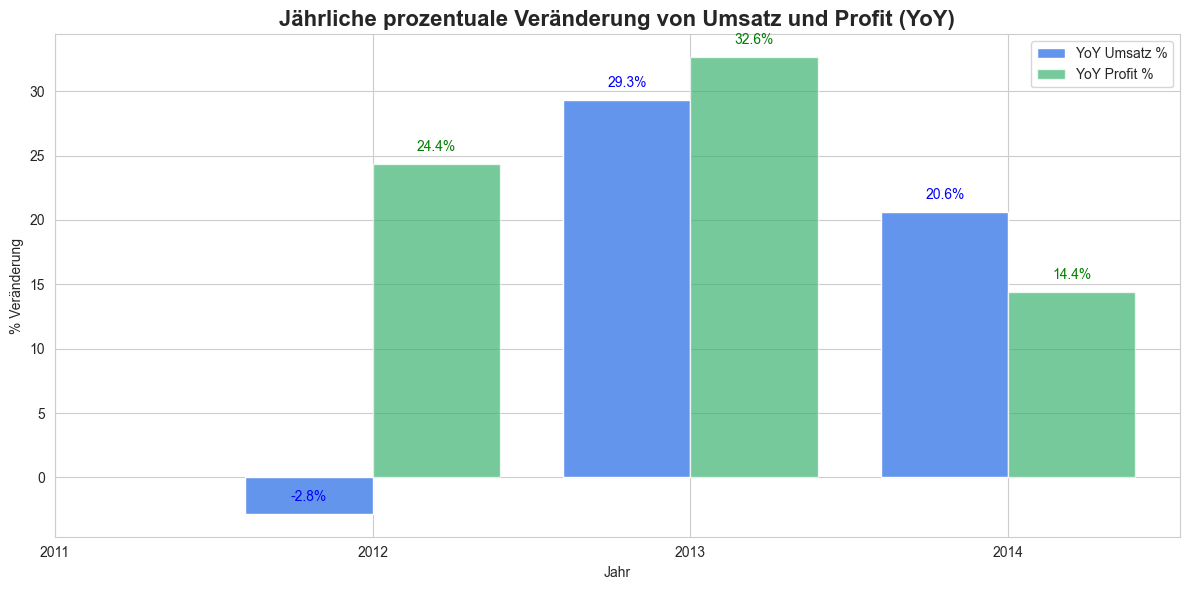

In [84]:
# 1. Jährliche Aggregation
yearly = superstore.resample("YE", on="Order Date")[["Sales", "Profit"]].sum().reset_index()

# 2. Nur Jahre mit nicht-null Sales und Profit
yearly_nonzero = yearly[(yearly["Sales"] != 0) & (yearly["Profit"] != 0)]

# 3. YoY Prozentuale Veränderung
yearly_nonzero["YoY_Sales_pct"] = yearly_nonzero["Sales"].pct_change() * 100
yearly_nonzero["YoY_Profit_pct"] = yearly_nonzero["Profit"].pct_change() * 100

# 4. Diagramm erstellen
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Balken für YoY Umsatz und Profit
plt.bar(yearly_nonzero["Order Date"].dt.year - 0.2, yearly_nonzero["YoY_Sales_pct"],
        width=0.4, color="cornflowerblue", label="YoY Umsatz %")
plt.bar(yearly_nonzero["Order Date"].dt.year + 0.2, yearly_nonzero["YoY_Profit_pct"],
        width=0.4, color="mediumseagreen", alpha=0.7, label="YoY Profit %")

# Werte über den Balken
for i, row in yearly_nonzero.iterrows():
    plt.text(row["Order Date"].year - 0.2, row["YoY_Sales_pct"] + 1, f'{row["YoY_Sales_pct"]:.1f}%',
             ha='center', color="blue", fontsize=10)
    plt.text(row["Order Date"].year + 0.2, row["YoY_Profit_pct"] + 1, f'{row["YoY_Profit_pct"]:.1f}%',
             ha='center', color="green", fontsize=10)

# Titel und Achsen
plt.title("Jährliche prozentuale Veränderung von Umsatz und Profit (YoY)", fontsize=16, fontweight="bold")
plt.ylabel("% Veränderung")
plt.xlabel("Jahr")
plt.xticks(yearly_nonzero["Order Date"].dt.year)
plt.legend()
plt.tight_layout()
plt.show()

Top-und Bottom-Monate nach Umsatz

In [210]:
top_months = monthly.nlargest(5, "Sales")
bottom_months = monthly.nsmallest(5, "Sales")
top_months
bottom_months

,Order Date,Sales,Profit,Monat,MoM_Sales_pct,MoM_Profit_pct
1,2011-02-28,4810.5580,865.7280,Feb 2011,-65.506389,-64.617532
13,2012-02-29,12210.8670,2821.2762,Feb 2012,-32.811620,-185.988119
12,2012-01-31,18174.0756,-3281.0070,Jan 2012,-73.867405,-136.522307
24,2013-01-31,18542.4910,2824.8233,Jan 2013,-75.250121,-64.764434
37,2014-02-28,20283.5134,1605.6478,Feb 2014,-54.626202,-77.726196


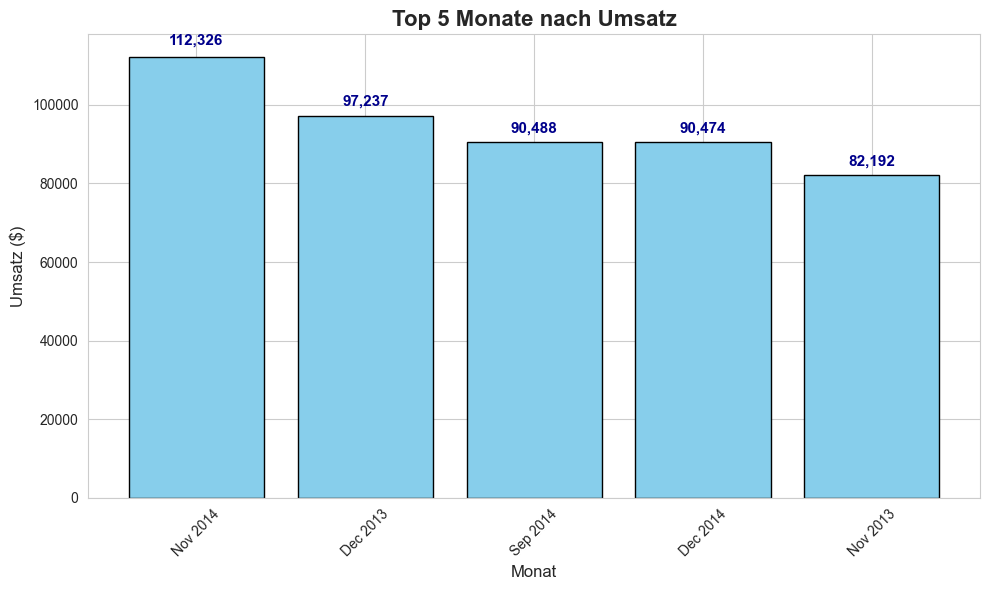

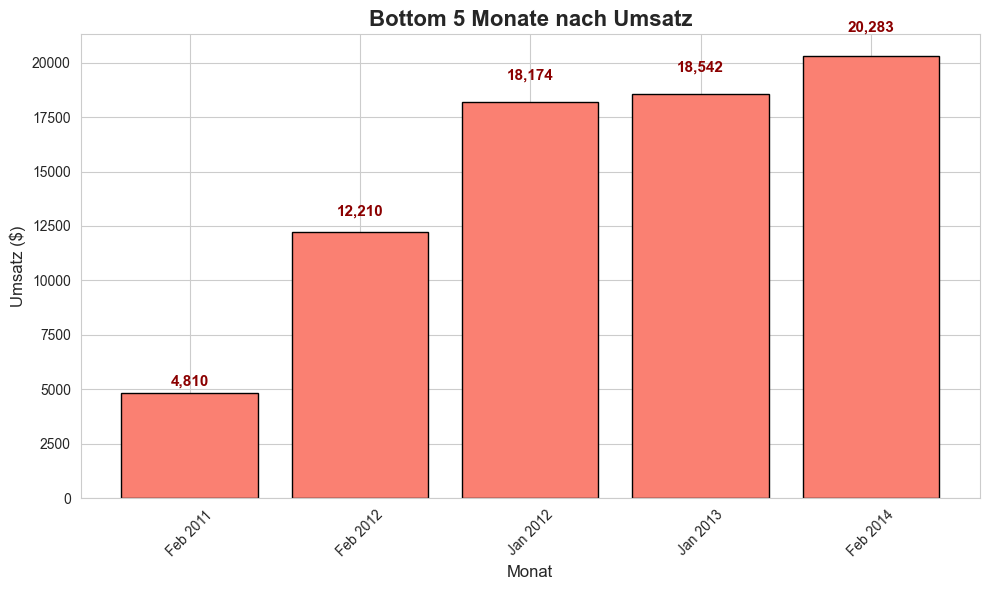

In [220]:
# Top 5 Monate
top_months = monthly.nlargest(5, "Sales").copy()
top_months['Monat'] = top_months['Order Date'].dt.strftime('%b %Y')
x_pos_top = np.arange(len(top_months))

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

bars = plt.bar(x_pos_top, top_months["Sales"], color="skyblue", edgecolor="black")

# Werte auf den Säulen anzeigen
for i, value in enumerate(top_months["Sales"]):
    plt.text(
        x_pos_top[i],
        value + value*0.02,
        f'{int(value):,}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='darkblue'
    )

plt.xticks(x_pos_top, top_months["Monat"], rotation=45)
plt.title("Top 5 Monate nach Umsatz", fontsize=16, fontweight="bold")
plt.ylabel("Umsatz ($)", fontsize=12)
plt.xlabel("Monat", fontsize=12)
plt.tight_layout()
plt.show()

#Bottom 5 Monate
bottom_months = monthly.nsmallest(5, "Sales").copy()
bottom_months['Monat'] = bottom_months['Order Date'].dt.strftime('%b %Y')
x_pos_bottom = np.arange(len(bottom_months))

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

bars = plt.bar(x_pos_bottom, bottom_months["Sales"], color="salmon", edgecolor="black")

# Werte auf den Säulen anzeigen
for i, value in enumerate(bottom_months["Sales"]):
    plt.text(
        x_pos_bottom[i],
        value + value*0.05,
        f'{int(value):,}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        color='darkred'
    )

plt.xticks(x_pos_bottom, bottom_months["Monat"], rotation=45)
plt.title("Bottom 5 Monate nach Umsatz", fontsize=16, fontweight="bold")
plt.ylabel("Umsatz ($)", fontsize=12)
plt.xlabel("Monat", fontsize=12)
plt.tight_layout()
plt.show()